# methods
## feature

In [1]:
from sklearn.datasets import make_blobs as mb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

x, y = mb(n_samples=100, centers=3)

data = sns.load_dataset('iris')
data.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
data = pd.read_csv(r'/Users/ansorisan/Desktop/machine learning/Bias_correction_ucl.csv')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30/06/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30/06/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30/06/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30/06/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30/06/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## regression


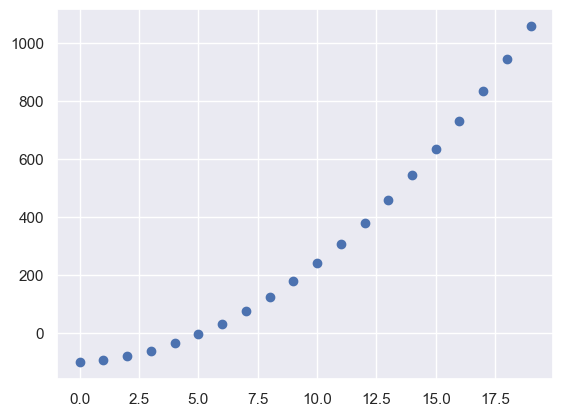

In [3]:
n = 20
x = np.arange(n)
y = 4*x + 3*(x**2) - 100

plt.scatter(x, y)

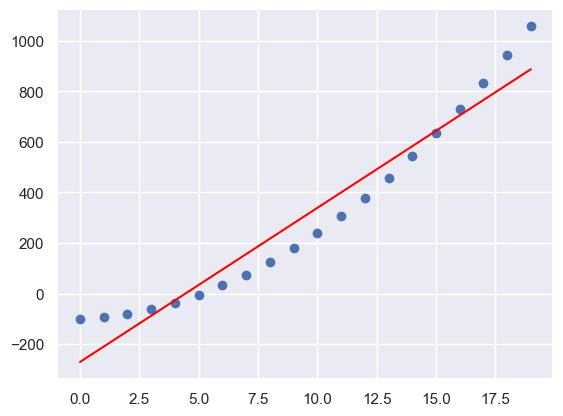

In [4]:
from sklearn.linear_model import LinearRegression as lr

model = lr()
model.fit(x[:, np.newaxis], y)
y_pred = model.predict(x[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

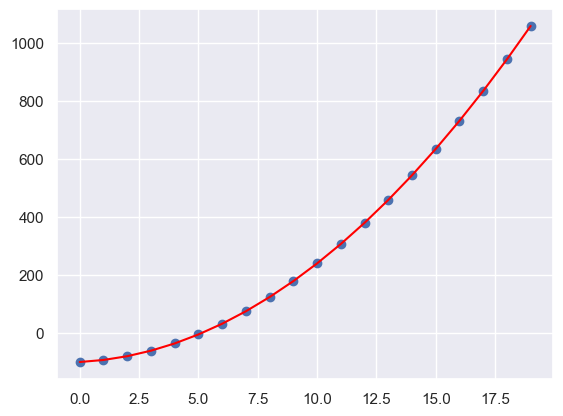

In [5]:
from sklearn.preprocessing import PolynomialFeatures as pf

xPoly = pf(degree=2).fit_transform(x[:, np.newaxis])
model = lr()
model.fit(xPoly, y)
y_pred = model.predict(xPoly)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

## classification


In [6]:
from sklearn.svm import SVC

y = data.species # iris species labels
x = data.drop(columns='species')  # iris features

model = SVC(gamma='auto')
model.fit(x, y)
# model.fit(x[:, np.newaxis], y)

y_pred = model.predict(x)
# y_pred = model.predict(x[:, np.newaxis])

y_pred

AttributeError: 'DataFrame' object has no attribute 'species'

## clustering

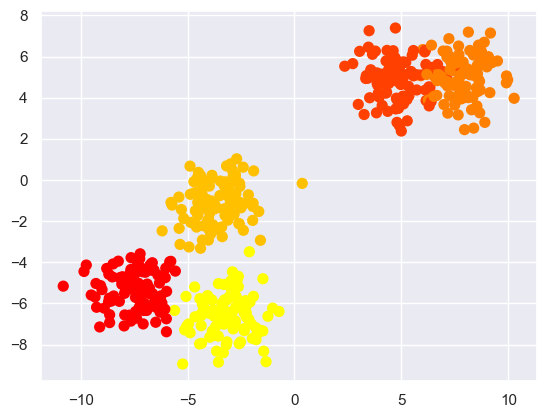

In [ ]:
x, y = mb(n_samples=500, centers=5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

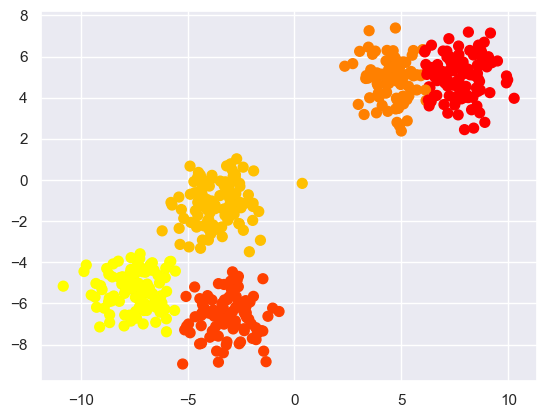

In [ ]:
from sklearn.cluster import KMeans as km

model = km(n_clusters=5)
model.fit(x)
y_pred = model.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=50, cmap='autumn')

# data preparation & preprocessing

## data standardization

In [ ]:
data = pd.read_csv(r'/Users/ansorisan/Desktop/machine learning/response_time_data.csv', sep=';', index_col=False)
data.head()

,MVC,MVVM,MVC.1,MVVM.1,MVC.2,MVVM.2
0,566,500,385,261,406,291
1,1012,803,70,117,541,463
2,1012,805,62,54,541,250
3,315,238,319,324,541,454
4,658,607,101,48,541,210


In [ ]:
from sklearn.preprocessing import StandardScaler as ss

data.mean(axis=0)
data.std(axis=0)

scaler = ss()
data_scaled = scaler.fit_transform(data)

data_scaled.mean(axis=0)
data_scaled.std(axis=0)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,MVC,MVVM,MVC.1,MVVM.1,MVC.2,MVVM.2
0,-0.006776,0.109869,2.242911,2.095886,0.247605,-0.197221
1,2.008045,1.710364,-0.639263,0.215855,1.700938,1.991295
2,2.008045,1.720929,-0.712461,-0.606658,1.700938,-0.718902
3,-1.140678,-1.274058,1.639027,2.918400,1.700938,1.876779
4,0.408837,0.675060,-0.355621,-0.684993,1.700938,-1.227859


# machine learning model
## linear regression (scratch)

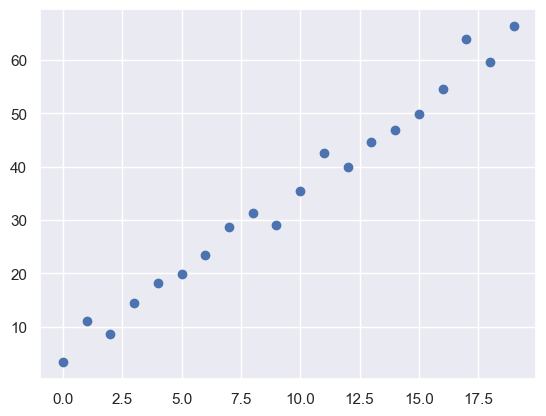

In [12]:
n = 20
x = np.arange(n)
y = 3*x + 6 + 3*np.random.randn(n) # remove noise (value after 6) for better results

plt.scatter(x, y)

In [13]:
on = np.ones((x.size, 1))
on

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [14]:
x1 = np.hstack((x[:, np.newaxis], on))
x1

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.]])

In [15]:
a = np.linalg.lstsq(x1, y, rcond=-1)
a[0]

array([3.16518373, 4.52505399])

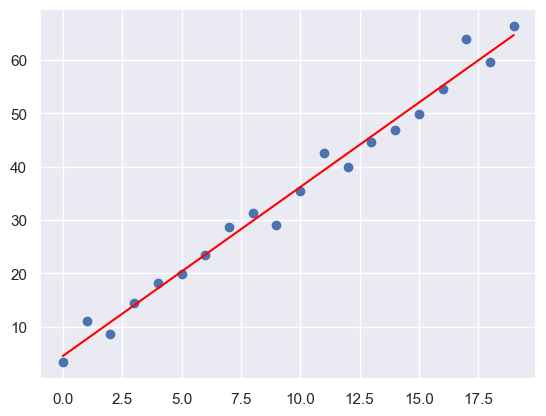

In [16]:
y_pred = a[0][0]*x + a[0][1]
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

## minimum-to-mean distance classifier (scratch)

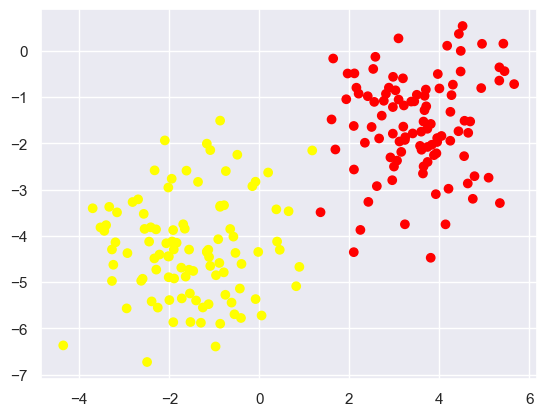

In [20]:
x, y = mb(n_samples=200, centers=2)
y[y==0] = -1
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='autumn')

In [24]:
idx = y == 1
x1 = x[idx, :]
x2 = x[~idx, :]

In [25]:
m1 = x1.mean(axis=0)
m1

array([-1.52963314, -4.27344184])

In [26]:
m2 = x2.mean(axis=0)
m2

array([ 3.5132674 , -1.60455064])

In [28]:
idx = np.random.randint(y.size)
r = x[idx, :]
d1 = ((r - m1)**2).sum()
d2 = ((r - m2)**2).sum()
d1, d2
if d1 < d2:
    print(y[idx], "1")
else:
    print(y[idx], "-1")

1 1


## k-means (scratch)

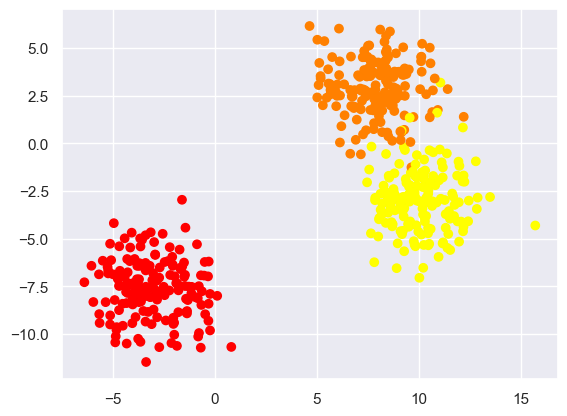

In [75]:
x, y = mb(n_samples=500, centers=3, cluster_std=1.5)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='autumn')

In [76]:
r = np.random.permutation(np.arange(x.shape[0]))

m1 = x[r[0], :]
m2 = x[r[1], :]
m3 = x[r[2], :]

def makeGroup(x, m1, m2, m3):
    d1 = ((x - m1)**2).sum(axis=1)
    d2 = ((x - m2)**2).sum(axis=1)
    d3 = ((x - m3)**2).sum(axis=1)

    d = np.hstack((d1[:, np.newaxis], d2[:, np.newaxis], d3[:, np.newaxis]))
    group = np.argmin(d, axis=1)
    
    # group = np.zeros(x.shape[0])
    # for i in range(x.shape[0]):
    #     if d1[i] < d2[i] and d1[i] < d3[i]:
    #         group[i] = 0
    #     elif d2[i] < d1[i] and d2[i] < d3[i]:
    #         group[i] = 1
    #     else:
    #         group[i] = 2
    return group

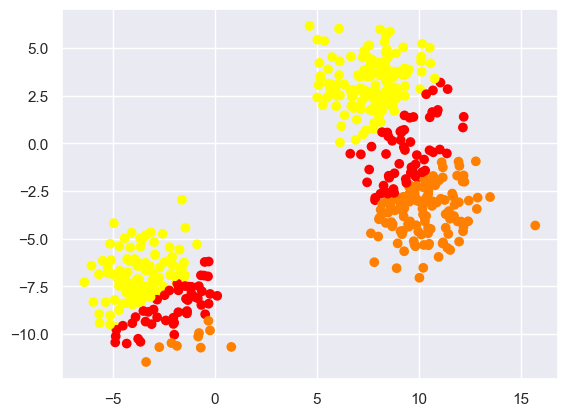

In [77]:
group = makeGroup(x, m1, m2, m3)
plt.scatter(x[:, 0], x[:, 1], c=group, cmap='autumn')

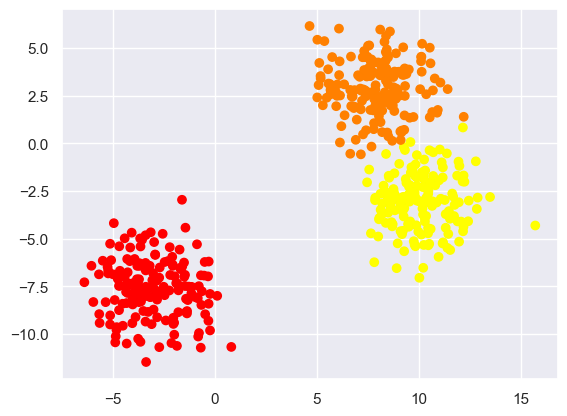

In [78]:
m1 = x[y == 0, :].mean(axis=0)
m2 = x[y == 1, :].mean(axis=0)
m3 = x[y == 2, :].mean(axis=0)
group = makeGroup(x, m1, m2, m3)
plt.scatter(x[:, 0], x[:, 1], c=group, cmap='autumn')

## overfitting example

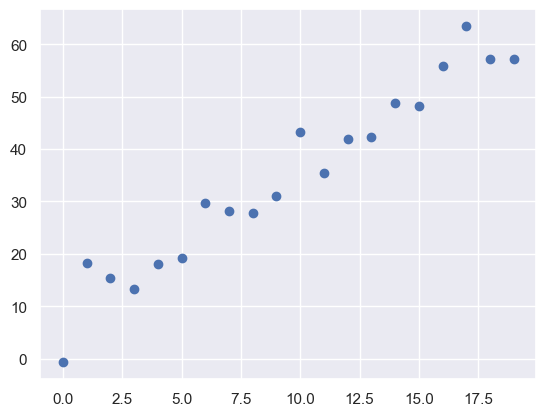

In [84]:
n = 20
x = np.arange(n)
y = 3*x + 6 + 3*np.random.randn(n) # remove noise (value after 6) for better results

plt.scatter(x, y)

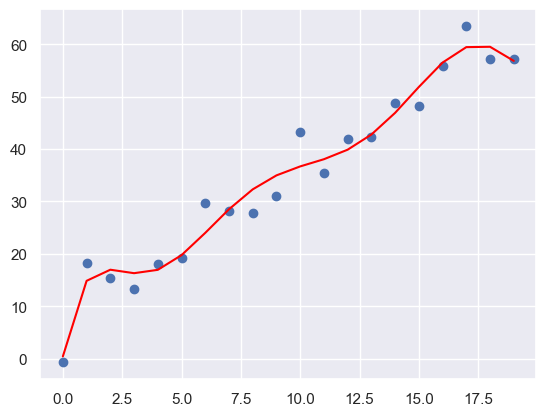

In [85]:
poly_model = pf(degree=7)
x_poly = poly_model.fit_transform(x[:, np.newaxis])
model = lr()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

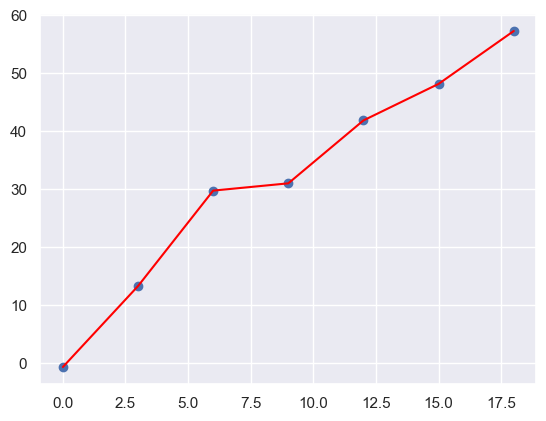

In [92]:
x1 = x[0:n:3]
y1 = y[0:n:3]
poly_model = pf(degree=6)
x_poly = poly_model.fit_transform(x1[:, np.newaxis])
model = lr()
model.fit(x_poly, y1)
y_pred = model.predict(x_poly)

plt.scatter(x1, y1)
plt.plot(x1, y_pred, color='red')

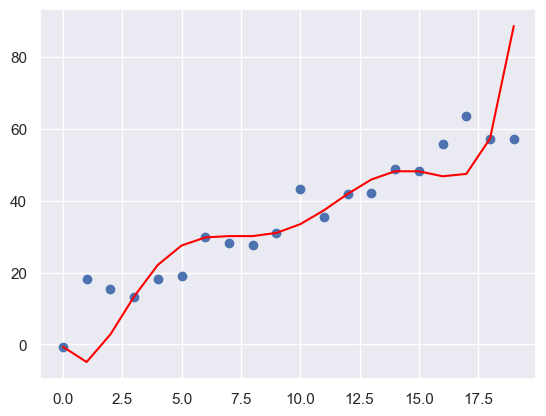

In [93]:
x_poly_all = poly_model.fit_transform(x[:, np.newaxis])
y_pred_all = model.predict(x_poly_all)
plt.scatter(x, y)
plt.plot(x, y_pred_all, color='red')

## regularization

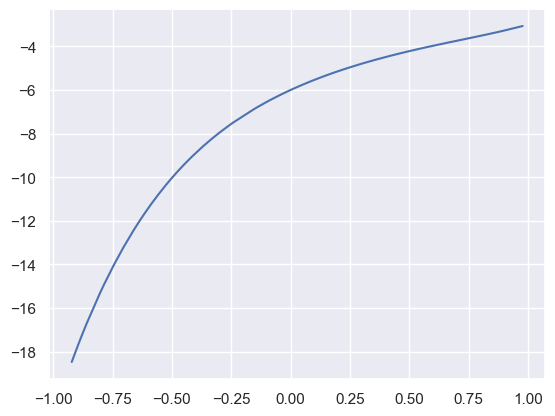

In [96]:
x = np.asarray([-np.random.rand(50), np.random.rand(50)])
x = x.flatten()
x = np.sort(x)

p1, p2, p3, p4, p5, p6 = 1, -2, 3, -4, 5, -6
y = p1*(x**5) + p2*(x**4) + p3*(x**3) + p4*(x**2) + p5*x + p6

plt.plot(x, y)